# Classify Cat-Dog images using  CNN model

In this notebook, we classify cat/dog images by using CNN model.

Architecture of our network is:
    
- (Input) -> [batch_size, 64, 64, 3]  >> Apply 32 filter of [5x5]
- (Convolutional layer 1)  -> [batch_size, 64, 64, 32]
- (ReLU 1)  -> [?, 64, 64, 32]
- (Max pooling 1) -> [?, 32, 32, 32]
- (Convolutional layer 2)  -> [?, 32, 32, 64] 
- (ReLU 2)  -> [?, 32, 32, 64] 
- (Max pooling 2)  -> [?, 16, 16, 64] 
- [fully connected layer 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [fully connected layer 4] -> [1x1]


The next cells will explore this new architecture.

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
!ls "/content/gdrive/My Drive"

'20190527_162723 (1).jpg'  '20190527_165048 (1).jpg'
 20190527_162723.jpg	    20190527_165048.jpg
'20190527_162753 (1).jpg'   20190527_171116.jpg
 20190527_162753.jpg	   '20190527_171656 (1).jpg'
'20190527_162801 (1).jpg'   20190527_171656.jpg
 20190527_162801.jpg	   'Colab Notebooks'
'20190527_162805 (1).jpg'   GeC.Debut.pdf
 20190527_162805.jpg	    ORG_DSC09353.JPG
'20190527_162811 (1).jpg'   ORG_DSC09357.JPG
 20190527_162811.jpg	    ORG_DSC09363.JPG
'20190527_162825 (1).jpg'   ORG_DSC09365.JPG
 20190527_162825.jpg	    pythondatasciencehandbook.pdf
'20190527_162845 (1).jpg'  'Rendez-vous Entretien PPAE 20190507.pdf'
 20190527_162845.jpg


### Starting the code

In [0]:
import tensorflow as tf
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
import matplotlib.pyplot as plt
#Start interaction session
sess = tf.InteractiveSession()


### Import dataset

In [0]:

IMG_SIZE = 64
TRAIN_DIR= 'dataset/training_set'
TEST_DIR = 'dataset/test_set'
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

# import os
# data_dir = os.path.expanduser('dataset')

# train_data_dir = os.path.join(data_dir, 'training_set')
# test_data_dir = os.path.join(data_dir, 'test_set')
# #validation_data_dir = path.join(data_dir, 'validation')

# class_names = os.listdir(train_data_dir) # Get names of classes


#### Write function to label our images

In [0]:
def label_img(img):
    word_label = img.split('.')[0]
    # conversion to one-hot array [cat,dog]
    if word_label == 'cat':
        return [1,0]
    elif word_label == 'dog':
        return [0,1]

#### Now we build another function to process the training and test images and their labels into arrays:

In [0]:
def create_data(IMG_SIZE,DIR):
    data = []
    for img in tqdm(os.listdir(DIR)):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        data.append([np.array(img)/225.,np.array(label)])
    shuffle(data)
    return data

_If your directory is a list (dogs and cats images in two separated folder), use the code below:_

In [0]:
#TRAIN_DIR= ['dataset/training_set/dogs','dataset/training_set/cats']
#TEST_DIR = ['dataset/test_set/dogs','dataset/test_set/cats']

# def create_train_data(IMG_SIZE):
#     training_data =[]
#     for directory in tqdm(TRAIN_DIR):
#         for img in tqdm(os.listdir(directory)):
#             label = label_img(img)
#             path = os.path.join(directory,img)
#             img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#             img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
#             training_data.append([np.array(img),np.array(label)])
#     shuffle(training_data)
#     np.save('train_data.npy',training_data)
#     return training_data
# #see more: https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/

Create a training data

In [0]:
# training_data = create_data(IMG_SIZE,TRAIN_DIR)   
# np.save('Colab Notebooks/dataset/train_data.npy', training_data)
training_data = np.load('./gdrive/My Drive/Colab Notebooks/CNN/dataset/train_data.npy',allow_pickle = True)

Create a test data

In [0]:
# test_data = create_data(IMG_SIZE,TEST_DIR)   
# np.save('test_data.npy', test_data)
test_data = np.load('./gdrive/My Drive/Colab Notebooks/CNN/dataset/test_data.npy',allow_pickle = True)

_For the images which are not labeled, we build the same function to process them but not contain labels._

In [0]:
# def process_unlabeled_data(IMG_SIZE,DIR):
#     data = []
#     for img in tqdm(os.listdir(DIR)):
#         im_num = img.split('.')[0]
#         path = os.path.join(DIR,img)
#         img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
#         training_data.append([np.array(img)/225.,im_num])
#     shuffle(data)
#     return data
# #Create a unlabeled dataset:
# unlabeled_data = process_unlabeled_data(64,UNLABELED_DIR)
# np.save('unlabeled_data.npy', unlabeled_data)

#### Converting images of the data set to tensors

In [0]:
#Training set
X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train = [i[1] for i in training_data]
#Test set
X_test =  np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test = [i[1] for i in test_data]

In [21]:
y_train[500]

array([0, 1])

### Initial parameters

Create general parameters for the model

In [0]:
width = 64 #witdh of the image in pixels
height = 64 #height of the image in pixels
n_channels = 1 # image channels (3 for colorscale and 1 for grayscale).
class_output = 2 #number of possible classifications for the problem

### Input and Output

Create place holders for inputs and outputs:

In [0]:
x_input = tf.placeholder(tf.float32,shape = [None,height,width,n_channels])
y_act = tf.placeholder(tf.float32,shape = [None, class_output])

_1st_ dimension: batch number (can be any size),

_2nd_ dimension: height,

_3rd_ dimension: width,

_4th_ dimension: image channels (3 channels as colorscale).

### 2. Convolutional Layer 1

<h4>Defining kernel weight and bias</h4>
We define a kernel here. The Size of the filter/kernel is 5x5;  Input channels is 1 (grayscale);  and we need 32 different feature maps (here, 32 feature maps means 32 different filters are applied on each image. So, the output of convolution layer would be 64x64x32). In this step, we create a filter / kernel tensor of shape <code>[filter_height, filter_width, in_channels, out_channels]</code>

In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev = 0.1 ))
b_conv1 = tf.Variable(tf.constant(0.1, shape = [32] )) # 32 biases for 32 outputs


<h4>Convolve image with weight tensor and add biases.</h4>

In [0]:
convolve1= tf.nn.conv2d(x_input, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1



In [9]:
convolve1

<tf.Tensor 'add:0' shape=(?, 64, 64, 32) dtype=float32>

#### Apply the ReLu activation function

Let $f(x)$ is a ReLU function,
$$f(x)=\max(0,x)$$

In [0]:
h_conv1 = tf.nn.relu(convolve1)

#### Apply the max pooling

In [11]:
conv1 = tf.nn.max_pool(h_conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')#max_pool 2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 32, 32, 32) dtype=float32>

First layer completed!

First layer completed. The output of layer 1  is 32 matrices of [32x32]

### 3. Convolutional Layer 2

#### Weights and Biases of kernels

We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 32 (from the 2nd Conv layer, we had 32 feature maps) 
- 64 output feature maps  

<b>Notice:</b> here, the input image is [32x32x32], the filter is [5x5x32], we use 64 filters of size [5x5x32], and the output of the convolutional layer would be 64 convolved image, [32x32x64].



In [0]:
W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev = 0.1 ))
b_conv2 = tf.Variable(tf.constant(0.1, shape = [64] )) # 64 biases for 64 outputs


<h4>Convolve image with weight tensor and add biases.</h4>

In [0]:
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2


In [14]:
convolve2

<tf.Tensor 'add_1:0' shape=(?, 32, 32, 64) dtype=float32>

#### Apply the ReLu activation function

In [0]:
h_conv2 = tf.nn.relu(convolve2)

#### Apply the max pooling

In [16]:
conv2 = tf.nn.max_pool(h_conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')#max_pool 2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 16, 16, 64) dtype=float32>

Second layer completed. The output of layer 2  is 64 matrices of [16x16]


### 4. Convolutional Layer 3

#### Weights and Biases of kernels

We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 128 (from the 3rd Conv layer, we had 128 feature maps) 
- 64 output feature maps  

<b>Notice:</b> here, the input image is [8x8x128], the filter is [5x5x128], we use 64 filters of size [5x5x128], and the output of the convolutional layer would be 64 convolved image, [8x8x64].



In [0]:
W_conv3 = tf.Variable(tf.truncated_normal([5,5,64,64], stddev = 0.1 ))
b_conv3 = tf.Variable(tf.constant(0.1, shape = [64] )) # 64 biases for 64 outputs


<h4>Convolve image with weight tensor and add biases.</h4>

In [0]:
convolve3= tf.nn.conv2d(conv2, W_conv3, strides=[1, 1, 1, 1], padding='SAME') + b_conv3


In [22]:
convolve3

<tf.Tensor 'add_3:0' shape=(?, 16, 16, 64) dtype=float32>

#### Apply the ReLu activation function

In [0]:
h_conv3 = tf.nn.relu(convolve3)

#### Apply the max pooling

In [24]:
conv3 = tf.nn.max_pool(h_conv3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')#max_pool 2x2
conv3

<tf.Tensor 'MaxPool_2:0' shape=(?, 8, 8, 64) dtype=float32>

### 5. Convolutional Layer 4

#### Weights and Biases of kernels

We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 64 (from the 2nd Conv layer, we had 64 feature maps) 
- 128 output feature maps  

<b>Notice:</b> here, the input image is [32x32x64], the filter is [5x5x64], we use 128 filters of size [5x5x64], and the output of the convolutional layer would be 128 convolved image, [32x32x128].


In [0]:
W_conv4 = tf.Variable(tf.truncated_normal([5,5,64,128], stddev = 0.1 ))
b_conv4 = tf.Variable(tf.constant(0.1, shape = [128] )) # 128 biases for 128 outputs

<h4>Convolve image with weight tensor and add biases.</h4>

In [0]:
convolve4= tf.nn.conv2d(conv3, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + b_conv4


In [28]:
convolve4

<tf.Tensor 'add_5:0' shape=(?, 8, 8, 128) dtype=float32>

#### Apply the ReLu activation function

In [0]:
h_conv4 = tf.nn.relu(convolve4)

#### Apply the max pooling

In [30]:
conv4 = tf.nn.max_pool(h_conv4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')#max_pool 2x2
conv4

<tf.Tensor 'MaxPool_3:0' shape=(?, 4, 4, 128) dtype=float32>

Third layer completed. The output of layer 3  is 128 matrices of [8x8].

### 6. Convolutional Layer 5

#### Weights and Biases of kernels

We apply the convolution again in this layer. Lets look at the second layer kernel:  
- Filter/kernel: 5x5 (25 pixels) 
- Input channels: 128 (from the 3rd Conv layer, we had 128 feature maps) 
- 64 output feature maps  

<b>Notice:</b> here, the input image is [8x8x128], the filter is [5x5x128], we use 64 filters of size [5x5x128], and the output of the convolutional layer would be 64 convolved image, [8x8x64].



In [0]:
W_conv5 = tf.Variable(tf.truncated_normal([3,3,128,256], stddev = 0.1 ))
b_conv5 = tf.Variable(tf.constant(0.1, shape = [256] )) # 64 biases for 64 outputs


<h4>Convolve image with weight tensor and add biases.</h4>

In [0]:
convolve5= tf.nn.conv2d(conv4, W_conv5, strides=[1, 1, 1, 1], padding='SAME') + b_conv5


In [34]:
convolve5

<tf.Tensor 'add_7:0' shape=(?, 4, 4, 256) dtype=float32>

#### Apply the ReLu activation function

In [0]:
h_conv5 = tf.nn.relu(convolve5)

#### Apply the max pooling

In [37]:
conv5 = tf.nn.max_pool(h_conv5, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')#max_pool 2x2
conv5

<tf.Tensor 'MaxPool_4:0' shape=(?, 2, 2, 256) dtype=float32>

### 7. Fully Connected Layer (Dense)

You need a fully connected layer to use the Softmax and create the probabilities in the end. Fully connected layers take the high-level filtered images from previous layer, that is all 64 matrices, and convert them to a flat array.

So, each matrix [7x7] will be converted to a matrix of [49x1], and then all of the 64 matrix will be connected, which make an array of size [3136x1]. We will connect it into another layer of size [1024x1]. So, the weight between these 2 layers will be [3136x1024]

#### Flattening Second Layer

In [0]:
layer5_matrix = tf.reshape(conv5,[-1,2*2*256]) # we don't care the 1st dimension


#### Weights and biase between layer 5 and 6

In [0]:
W_fc1 = tf.Variable(tf.truncated_normal([2*2*256,1024], stddev = 0.1 ))
b_fc1 = tf.Variable(tf.constant(0.1, shape = [1024] )) # 1024 biases for 1024 outputs


#### Matrix Multiplication (Applying weights and biases)

In [0]:
fc1 = tf.matmul(layer5_matrix, W_fc1)+b_fc1

#### Apply the ReLU activation function

In [42]:
h_fc1 = tf.nn.relu(fc1)
h_fc1

<tf.Tensor 'Relu_6:0' shape=(?, 1024) dtype=float32>

Third layer is completed!

### 8. Dropout Layer, (Optional phase for reducing overfitting)

It is a phase where the network "forget" some features. At each training step in a mini-batch, some units get switched off randomly so that it will not interact with the network. That is, it weights cannot be updated, nor affect the learning of the other network nodes.  This can be very useful for very large neural networks to prevent overfitting.

In [43]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, rate = 1-keep_prob)
layer_drop

<tf.Tensor 'dropout/mul_1:0' shape=(?, 1024) dtype=float32>

Note: p (keep_prob)=0.5 is recommended configuration, except for the input layer which is recommended to have p=0.8.

In other words, at testing time we treat it as a normal neural network without dropout, and at training time we upscale the values by 1/prob.

### 9. Readout Layer (Softmax Layer)

Type: Softmax, Fully Connected Layer.

<h4>Weights and Biases</h4>

In last layer, CNN takes the high-level filtered images and translate them into votes using softmax.
Input channels: 1024 (neurons from the 3rd Layer); 10 output features

In [0]:
W_fc2 = tf.Variable(tf.truncated_normal([1024,2], stddev = 0.1 ))
b_fc2 = tf.Variable(tf.constant(0.1, shape = [2] )) # 2 biases for 2 output


#### Matrix Multiplication (Applying weights and biases)

In [0]:
fc = tf.matmul(layer_drop, W_fc2)+b_fc2

#### Apply the Softmax activation function

In [0]:
y_CNN = tf.nn.softmax(fc)

<a id="ref7"></a>
<h2>Summary of the Deep Convolutional Neural Network</h2>

Now is time to remember the structure of  our network

#### 0) Input - MNIST dataset
#### 1) Convolutional and Max-Pooling
#### 2) Convolutional and Max-Pooling
#### 3) Fully Connected Layer
#### 4) Processing - Dropout
#### 5) Readout layer - Fully Connected
#### 6) Outputs - Classified digits

We've completed our CNN model. Now we will train it by our MNIST dataset.

### 10.Define functions

#### Define the loss function

1. We use Binary Cross-Entropy function (Log loss) to determine the loss of model.

$$H(p,q) = -\dfrac{1}{N}\sum_{x}p(x)\log(q(x))+(1-p(x))\log (1-q(x))$$

where $p$ is a probability of actual values, $q$ is a probability of predicted values and $N$ is number of instances. 

In [0]:
#binary_cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_act*tf.log(y_CNN)+(1-y_act)*tf.log(1-y_CNN),
                 #                                    reduction_indices=[1]))


2. We use cross-entropy function to determine the loss of model.

$$H(p,q) = -\dfrac{1}{N}\sum_{x}p(x)\log q(x)$$

where $p$ is a probability of actual values, $q$ is a probability of predicted values and $N$ is number of instances. 

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_act*tf.log(y_CNN),reduction_indices=[1]))


#### Define the optimizer

We use the optimizer AdamOptimizer.

In [0]:
train_step = tf.train.AdamOptimizer(learning_rate = 1e-4).minimize(cross_entropy)


#### Define prediction

In [0]:
correct_prediction =  tf.equal(tf.argmax(y_CNN,1),tf.argmax(y_act,1))

#### Define accuracy

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

### 11. Run session and Train our model

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
#Vectors for stroring accuracy and loss values
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
#Setting batch size to avoid costly computation
size_batch = 50
train_n_batches = len(X_train[0])//size_batch
test_n_batches = len(X_test[0])//size_batch

for _ in range(3000):
    cumulative_train_accuracy = 0.0
    cumulative_train_loss =0.0
    cumulative_test_accuracy = 0.0
    cumulative_test_loss =0.0
    #Train the model
    for i in range(train_n_batches):
        batch_X = X_train[i*size_batch:(i+1)*size_batch]
        batch_y = y_train[i*size_batch:(i+1)*size_batch]
        batch_train_accuracy, batch_train_loss = sess.run([accuracy,cross_entropy],feed_dict = {x_input: batch_X,y_act: batch_y,keep_prob: 0.8})
        cumulative_train_accuracy += batch_train_accuracy
        cumulative_train_loss += batch_train_loss
        train_step.run(feed_dict = {x_input: batch_X, y_act:batch_y,keep_prob: 0.5})
    train_accuracy.append(cumulative_train_accuracy/train_n_batches)
    train_loss.append(cumulative_train_loss/train_n_batches)
    #Evaluate the model (evaluate in batches to avoid out-of-memory issues)
    for j in range(test_n_batches):
        batch_X = X_test[j*size_batch:(j+1)*size_batch]
        batch_y = y_test[j*size_batch:(j+1)*size_batch]
        batch_test_accuracy, batch_test_loss = sess.run([accuracy,cross_entropy],feed_dict = {x_input:batch_X, y_act:batch_y,keep_prob: 0.8})
        cumulative_test_accuracy += batch_test_accuracy
        cumulative_test_loss += batch_test_loss
    test_accuracy.append(cumulative_test_accuracy/test_n_batches)
    test_loss.append(cumulative_test_loss/test_n_batches)    
    

### 12.Plot train-validation loss and accuracy 

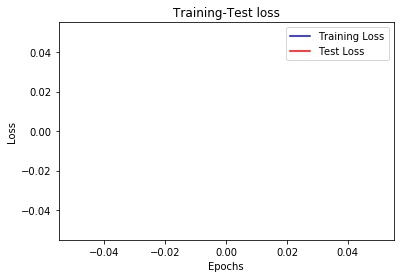

In [59]:
#Training-Validation loss
plt.plot(range(len(train_loss)),train_loss, color = 'b', label = "Training Loss" )
plt.plot(range(len(train_loss)),test_loss, color = 'r', label = "Test Loss" )
plt.title("Training-Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

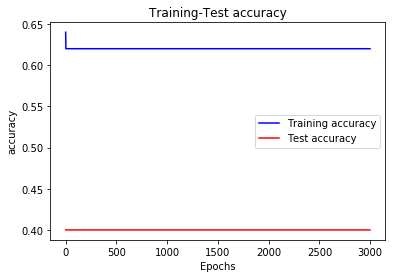

In [60]:
#Training-Validation Accuracy
plt.plot(range(len(train_accuracy)),train_accuracy, color = 'b', label = "Training accuracy" )
plt.plot(range(len(train_accuracy)),test_accuracy, color = 'r', label = "Test accuracy" )
plt.title("Training-Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Evaluate the model

In [0]:
#evaluate in batches to avoid out-of-memory issues
n_batches = mnist.test.images.shape[0]//50
cumulative_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    cumulative_accuracy += accuracy.eval(feed_dict = {x:batch[0], y_act:batch[1],keep_prob: 1.0})
print("Test accuracy {}".format(cumulative_accuracy/n_batches))

### Visualization

Fistly, we will visualize all the filters.

In [0]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1]))

In [0]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Secondly,  we will see the output of an image passing through 1st convolution layer.

In [0]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0,5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]),cmap="gray")

In [0]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3] #remember that size of 1st convolution layer is
                                  # [-1,28,28,32]      
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.title('Image through filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

Finally, we will see the output of an image passing through 2nd convolution layer.

In [0]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]#size of 2nd convolution layer is
                                  # [-1,7,7,64]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.title('Image through filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")